# Homework Assignment  6

In [1]:
!pip install turicreate
!pip install kaggle 
!pip install gensim
!pip install pyLDAvis
!pip install spaCy
!pip install afinn


  Using cached numpy-1.18.5-cp37-cp37m-manylinux1_x86_64.whl (20.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.4
    Uninstalling numpy-1.21.4:
      Successfully uninstalled numpy-1.21.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.15.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
pyldavis 3.3.1 requires numpy>=1.20.0, but you have numpy 1.18.5 which is incompatible.
librosa 0.8.1 requires resampy>=0.2.2, but you have resampy 0.2.1 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


  Using cached numpy-1.21.4-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
tensorflow 2.0.4 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
tensorflow-probability 0.15.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
librosa 0.8.1 requires resampy>=0.2.2, but you have resampy 0.2.1 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which

In [1]:
#setting up Kaggle & TuriCreate package s
import json
import os

!mkdir /root/.kaggle/
# Installing the Kaggle package

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"amirbialer","key":"f2af62d43f0aaf0ee3bea5998634a1b7"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [2]:
import pandas as pd
import turicreate as tc
import numpy as np

**Question 1:** Construct a sentiment classifier using 80% of the reviews in the [Amazon Fine Food Reviews dataset](https://www.kaggle.com/snap/amazon-fine-food-reviews).
The classifier needs to predict if a product got a one-star or a five-star review. 
Evaluate the classifier using the rest of the data (30pt). 


In [3]:
!mkdir ./datasets
!mkdir ./datasets/amazon

# download the dataset from Kaggle and unzip it
!kaggle datasets download -d snap/amazon-fine-food-reviews -p ./datasets/amazon
!unzip ./datasets/amazon/*.zip  -d ./datasets/amazon/

mkdir: cannot create directory ‘./datasets’: File exists
mkdir: cannot create directory ‘./datasets/amazon’: File exists
amazon-fine-food-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./datasets/amazon/amazon-fine-food-reviews.zip
replace ./datasets/amazon/Reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [4]:
rev=pd.read_csv("/content/datasets/amazon/Reviews.csv")

In [7]:
rev = rev.replace({pd.np.nan: None})
sf=tc.SFrame(rev)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


In [18]:
rev1=rev[np.logical_or(rev["Score"]==1,rev["Score"]==5)]
sf1=tc.SFrame(rev1)

In [20]:
sf1

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5
11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5
12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5
13,B0009XLVG0,A327PCT23YH90,LT,1,1,1


In [39]:
test, train  = sf1.random_split(0.2)
print(f"Train size {len(train)}\nTest size: {len(test)}" )
features_list = ['Text']
cls = tc.classifier.create(train,features=features_list, target="Score")

Train size 332465
Test size: 82925
PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: LogisticClassifier, SVMClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Logistic regression:

--------------------------------------------------------

Number of examples          : 315841

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

Number of coefficients      : 227394

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.264751     | 0.999997          | 0.921379            |

| 1         | 4        | 1.000000  | 0.524670     | 0.999997          | 0.921379            |

| 2         | 6        | 1.000000  | 0.783781     | 0.999997          | 0.921379            |

| 3         | 8        | 1.000000  | 1.038523     | 0.999997          | 0.921379            |

| 4         | 10       | 1.000000  | 1.286177     | 0.999997          | 0.921379            |

| 9         | 17       | 1.000000  | 2.288514     | 0.999997          | 0.921379            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 315841

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

Number of coefficients    : 227394

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.202883     | 0.999997          | 0.921379            |

| 1         | 4        | 1.000000  | 0.392649     | 0.999997          | 0.921379            |

| 2         | 6        | 0.701215  | 0.576348     | 0.999997          | 0.921379            |

Warning: Reached max step size.

| 3         | 13       | 25.000000 | 1.090275     | 0.999997          | 0.921379            |

| 4         | 16       | 12.500000 | 1.352761     | 0.999997          | 0.921379            |

| 9         | 27       | 0.408197  | 2.376879     | 0.999997          | 0.921379            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: LogisticClassifier              : 0.921378729547642
PROGRESS: SVMClassifier                   : 0.921378729547642
PROGRESS: ---------------------------------------------
PROGRESS: Selecting LogisticClassifier based on validation set performance.


In [40]:
raw=cls.evaluate(test)
raw

{'accuracy': 0.9240639131745553,
 'auc': 0.8128545948565413,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 3
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        1        |  4003 |
 |      1       |        5        |  6297 |
 |      5       |        5        | 72625 |
 +--------------+-----------------+-------+
 [3 rows x 3 columns],
 'f1_score': 0.9584485341181284,
 'log_loss': 0.25771141113336804,
 'precision': 0.9202123615721852,
 'recall': 1.0,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+-----+-------+-------+
 | threshold |        fpr         | tpr |   p   |   n   |
 +-----------+--------------------+-----+-------+-------+
 |    0.0    |        1.0         | 1.0 | 72625 | 10300 |
 |   0.001   | 0.6113592233009709 | 1.0 | 72625 | 10

**Question 2:** Construct a sentiment classifier using features from the [TextBlob package](https://textblob.readthedocs.io/en/dev/index.html),
    and from the [affin package](https://pypi.org/project/afinn/). Compare the two classifiers results and visualize it (however you want) (20pt)

## TextBob

In [29]:
import textblob
from textblob import TextBlob
sf2=sf1[["Text","Score"]]
rev2=rev1[["Text","Score"]]
sf2["textblob"]=rev2["Text"].apply(lambda x: TextBlob(x).sentiment)


In [30]:
test, train  = sf2.random_split(0.2)
print(f"Train size {len(train)}\nTest size: {len(test)}" )
features_list = ['textblob']
cls_blob = tc.classifier.create(train,features=features_list, target="Score")

Train size 332487
Test size: 82903
PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, SVMClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 315862

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 2

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.194507     | 0.894875          | 0.892812            | 0.518680          | 0.519441            |

| 2         | 0.386007     | 0.895378          | 0.893173            | 0.424207          | 0.425526            |

| 3         | 0.582080     | 0.895344          | 0.893353            | 0.367194          | 0.368754            |

| 4         | 0.792320     | 0.895530          | 0.893594            | 0.331168          | 0.333026            |

| 5         | 0.973974     | 0.895673          | 0.893534            | 0.307894          | 0.310009            |

| 10        | 1.879942     | 0.895964          | 0.893714            | 0.268846          | 0.271462            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 315862

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 2

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.171736     | 0.874689          | 0.873865            | 0.383413          | 0.385497            |

| 2         | 0.312408     | 0.874746          | 0.873865            | 0.383472          | 0.385575            |

| 3         | 0.447375     | 0.874702          | 0.873805            | 0.383442          | 0.385587            |

| 4         | 0.580629     | 0.874869          | 0.873865            | 0.357820          | 0.359732            |

| 5         | 0.719327     | 0.874914          | 0.873865            | 0.362617          | 0.364561            |

| 10        | 1.414272     | 0.875807          | 0.874887            | 0.337366          | 0.339088            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 315862

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 2

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.197011     | 0.894875          | 0.892812            | 0.313681          | 0.315509            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 315862

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 2

Number of coefficients    : 3

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.204329     | 0.874882          | 0.874045            |

| 1         | 4        | 1.000000  | 0.386977     | 0.874835          | 0.874045            |

| 2         | 6        | 1.000000  | 0.574873     | 0.874847          | 0.874045            |

| 3         | 8        | 1.000000  | 0.771497     | 0.878998          | 0.877053            |

| 4         | 9        | 1.000000  | 0.903050     | 0.879802          | 0.878617            |

| 9         | 18       | 1.000000  | 1.772715     | 0.879159          | 0.877474            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 315862

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 2

Number of coefficients      : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.410229     | 0.880954          | 0.880120            |

| 2         | 3        | 0.681385     | 0.888613          | 0.888060            |

| 3         | 4        | 0.971822     | 0.891003          | 0.890767            |

| 4         | 5        | 1.239381     | 0.891927          | 0.891970            |

| 5         | 6        | 1.501281     | 0.891950          | 0.891970            |

| 6         | 7        | 1.777513     | 0.891950          | 0.891970            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.8937142857142857
PROGRESS: RandomForestClassifier          : 0.8748872180451128
PROGRESS: DecisionTreeClassifier          : 0.892812030075188
PROGRESS: SVMClassifier                   : 0.8774736842105263
PROGRESS: LogisticClassifier              : 0.8919699248120301
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.


In [37]:
tb=cls_blob.evaluate(test)
tb

{'accuracy': 0.8942378442275912,
 'auc': 0.8568063167904548,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      5       |        1        |  1682 |
 |      1       |        1        |  3323 |
 |      1       |        5        |  7086 |
 |      5       |        5        | 70812 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9416990265439651,
 'log_loss': 0.27324069385505856,
 'precision': 0.9090348917815605,
 'recall': 0.9767980798410903,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+-----+-----+-------+-------+
 | threshold | fpr | tpr |   p   |   n   |
 +-----------+-----+-----+-------+-------+
 |    0.0    | 1.0 | 1.0 | 72494 | 10409 |
 |   0.001   | 1.0 | 1.0 | 72494 | 10409 |
 |   0.002

## Afinn

In [36]:
!pip install afinn
import afinn
from afinn import Afinn
afn = Afinn()
sf3=sf1[["Text","Score"]]
sf3["afinn"]=rev1["Text"].apply(lambda x: afn.score(x))


In [41]:
test, train  = sf3.random_split(0.2)
print(f"Train size {len(train)}\nTest size: {len(test)}" )
features_list = ['afinn']
cls_af = tc.classifier.create(train,features=features_list, target="Score")

Train size 332078
Test size: 83312
PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, SVMClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 315474

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.151453     | 0.893151          | 0.894363            | 0.522710          | 0.521764            |

| 2         | 0.299056     | 0.893151          | 0.894363            | 0.431039          | 0.429558            |

| 3         | 0.432828     | 0.893151          | 0.894363            | 0.376500          | 0.374648            |

| 4         | 0.568050     | 0.893151          | 0.894363            | 0.342761          | 0.340630            |

| 5         | 0.698548     | 0.893151          | 0.894363            | 0.321599          | 0.319287            |

| 10        | 1.389895     | 0.893148          | 0.894363            | 0.290239          | 0.287564            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 315474

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.142713     | 0.893148          | 0.894363            | 0.323971          | 0.321684            |

| 2         | 0.261832     | 0.893148          | 0.894363            | 0.324020          | 0.321745            |

| 3         | 0.393367     | 0.893148          | 0.894363            | 0.323996          | 0.321709            |

| 4         | 0.524993     | 0.893148          | 0.894363            | 0.324027          | 0.321750            |

| 5         | 0.653049     | 0.893148          | 0.894363            | 0.324011          | 0.321741            |

| 10        | 1.320983     | 0.893148          | 0.894363            | 0.324026          | 0.321750            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 315474

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.154118     | 0.893151          | 0.894363            | 0.324012          | 0.321725            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 315474

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 5.000000  | 0.158854     | 0.875917          | 0.876897            |

| 1         | 5        | 5.000000  | 0.275929     | 0.885747          | 0.887377            |

| 2         | 6        | 5.000000  | 0.355200     | 0.221378          | 0.224584            |

| 3         | 10       | 0.560212  | 0.550358     | 0.885747          | 0.887377            |

| 4         | 11       | 0.700265  | 0.628858     | 0.881299          | 0.881896            |

| 9         | 22       | 0.314077  | 1.233976     | 0.874494          | 0.875391            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 315474

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

Number of coefficients      : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.323807     | 0.874896          | 0.875873            |

| 2         | 3        | 0.531827     | 0.881299          | 0.881896            |

| 3         | 4        | 0.740436     | 0.885747          | 0.887377            |

| 4         | 5        | 0.963372     | 0.888365          | 0.890569            |

| 5         | 6        | 1.180223     | 0.888365          | 0.890569            |

| 6         | 7        | 1.403598     | 0.888365          | 0.890569            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.8943628041435798
PROGRESS: RandomForestClassifier          : 0.8943628041435798
PROGRESS: DecisionTreeClassifier          : 0.8943628041435798
PROGRESS: SVMClassifier                   : 0.8753914719344736
PROGRESS: LogisticClassifier              : 0.8905685377017586
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.


In [42]:
af=cls_af.evaluate(test)
af

{'accuracy': 0.8906520069137699,
 'auc': 0.8136013753926062,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      5       |        1        |  1622 |
 |      1       |        1        |  3112 |
 |      1       |        5        |  7488 |
 |      5       |        5        | 71090 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9397845197964175,
 'log_loss': 0.2936933457500075,
 'precision': 0.9047061518491181,
 'recall': 0.9776928154912532,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+-----+-----+-------+-------+
 | threshold | fpr | tpr |   p   |   n   |
 +-----------+-----+-----+-------+-------+
 |    0.0    | 1.0 | 1.0 | 72712 | 10600 |
 |   0.001   | 1.0 | 1.0 | 72712 | 10600 |
 |   0.002 

## Visualization


(0.7, 0.9)

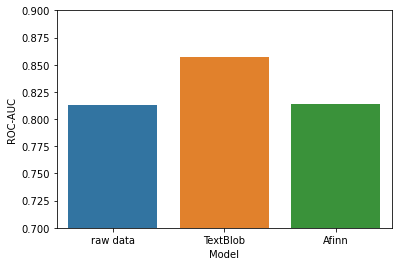

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

ax=sns.barplot(x=["raw data", "TextBlob", "Afinn"], y=[raw["auc"], tb["auc"], af["auc"]])
ax.set_xlabel("Model")
ax.set_ylabel("ROC-AUC")
ax.set_ylim([0.7,0.9])

**Question 3:**  Select a different reviews dataset and create a sentiment classifier which utilizes word embeddings (25pt).
Evaluate this classifier (5pt). Try to improve your classifier by adding additional features (20pt)

In [47]:
!mkdir ./datasets
!mkdir ./datasets/ecommerce

# download the dataset from Kaggle and unzip it
!kaggle datasets download -d nicapotato/womens-ecommerce-clothing-reviews -p ./datasets/ecommerce
!unzip ./datasets/ecommerce/*.zip  -d ./datasets/ecommerce/

mkdir: cannot create directory ‘./datasets’: File exists
  0% 0.00/2.79M [00:00<?, ?B/s]
100% 2.79M/2.79M [00:00<00:00, 45.4MB/s]
Archive:  ./datasets/ecommerce/womens-ecommerce-clothing-reviews.zip
  inflating: ./datasets/ecommerce/Womens Clothing E-Commerce Reviews.csv  


In [49]:
em=pd.read_csv("/content/datasets/ecommerce/Womens Clothing E-Commerce Reviews.csv")
em

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [75]:
em = em.replace({pd.np.nan: None})
em1=em.loc[np.logical_or(em["Rating"]==1,em["Rating"]==5)]
sf_em=tc.SFrame(em)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


In [76]:
test, train  = sf_em.random_split(0.2)
print(f"Train size {len(train)}\nTest size: {len(test)}" )
features_list = ['Review Text']
cls_em = tc.classifier.create(train,features=features_list, target="Rating")

Train size 18807
Test size: 4679
PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 17866

Number of classes           : 5

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.114879     | 0.562745          | 0.565356            | 1.453899          | 1.454628            |

| 2         | 0.199495     | 0.562633          | 0.565356            | 1.366360          | 1.367582            |

| 3         | 0.278713     | 0.562465          | 0.565356            | 1.311932          | 1.313730            |

| 4         | 0.349719     | 0.562465          | 0.565356            | 1.276623          | 1.279084            |

| 5         | 0.436741     | 0.562465          | 0.565356            | 1.253163          | 1.256357            |

| 10        | 0.795954     | 0.562465          | 0.565356            | 1.209867          | 1.217025            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 17866

Number of classes           : 5

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.101717     | 0.562689          | 0.565356            | 1.250087          | 1.248954            |

| 2         | 0.171685     | 0.562577          | 0.565356            | 1.248763          | 1.249222            |

| 3         | 0.278263     | 0.562577          | 0.565356            | 1.248705          | 1.249277            |

| 4         | 0.347219     | 0.562633          | 0.565356            | 1.248888          | 1.249092            |

| 5         | 0.410447     | 0.562633          | 0.565356            | 1.248832          | 1.248781            |

| 10        | 0.751602     | 0.562745          | 0.565356            | 1.248585          | 1.248996            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 17866

Number of classes           : 5

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.133426     | 0.562745          | 0.565356            | 1.248441          | 1.249760            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 17866

Number of classes           : 5

Number of feature columns   : 1

Number of unpacked features : 1

Number of coefficients      : 68824

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 5.000000  | 0.095361     | 0.954662          | 0.565356            |

| 1         | 5        | 5.000000  | 1.591394     | 0.970055          | 0.553666            |

| 2         | 7        | 2.571855  | 3.060296     | 0.989365          | 0.565356            |

| 3         | 10       | 0.771535  | 4.534307     | 0.989365          | 0.565356            |

| 4         | 12       | 0.771535  | 6.015438     | 0.989365          | 0.565356            |

| 9         | 17       | 1.000000  | 13.346103    | 0.989365          | 0.565356            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.565356004250797
PROGRESS: RandomForestClassifier          : 0.565356004250797
PROGRESS: DecisionTreeClassifier          : 0.565356004250797
PROGRESS: LogisticClassifier              : 0.565356004250797
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.


In [77]:
no_extra_features=cls_em.evaluate(test)
no_extra_features

{'accuracy': 0.5449882453515709,
 'auc': 0.5086348160539746,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 5
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      4       |        5        |  1049 |
 |      1       |        5        |  169  |
 |      3       |        5        |  563  |
 |      5       |        5        |  2550 |
 |      2       |        5        |  348  |
 +--------------+-----------------+-------+
 [5 rows x 3 columns],
 'f1_score': 0.14109835385253838,
 'log_loss': 1.2388234582056667,
 'precision': 0.5449882453515709,
 'recall': 0.2,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 	class	int
 
 Rows: 5005
 
 Data:
 +-----------+-----+-----+-----+------+-------+
 | threshold | fpr | tpr |  p  |  n   | class |
 +-----------+-----+-----+-----+------+-------+
 |    0.0    | 1.0 | 1.0 | 169 | 4510 | 

In [78]:
all_features=[ i for i in sf_em.column_names() if i!="Rating"]
all_features

['Unnamed: 0',
 'Clothing ID',
 'Age',
 'Title',
 'Review Text',
 'Recommended IND',
 'Positive Feedback Count',
 'Division Name',
 'Department Name',
 'Class Name']

In [79]:
test, train  = sf_em.random_split(0.2)
print(f"Train size {len(train)}\nTest size: {len(test)}" )
features_list = all_features
cls_ema = tc.classifier.create(train,features=features_list, target="Rating")

Train size 18657
Test size: 4829
PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 17724

Number of classes           : 5

Number of feature columns   : 10

Number of unpacked features : 10

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.188618     | 0.639641          | 0.618435            | 1.356975          | 1.363104            |

| 2         | 0.380277     | 0.642067          | 0.621651            | 1.213571          | 1.221891            |

| 3         | 0.565671     | 0.641277          | 0.623794            | 1.120790          | 1.130833            |

| 4         | 0.764995     | 0.646694          | 0.623794            | 1.054579          | 1.067995            |

| 5         | 0.951024     | 0.647991          | 0.623794            | 1.007442          | 1.023770            |

| 10        | 1.840615     | 0.652900          | 0.621651            | 0.892188          | 0.918844            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 17724

Number of classes           : 5

Number of feature columns   : 10

Number of unpacked features : 10

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.187307     | 0.634112          | 0.614148            | 1.067538          | 1.084987            |

| 2         | 0.335350     | 0.634450          | 0.615220            | 1.047699          | 1.062023            |

| 3         | 0.512057     | 0.635974          | 0.612004            | 1.035961          | 1.052134            |

| 4         | 0.671621     | 0.636538          | 0.613076            | 1.030789          | 1.045714            |

| 5         | 0.844932     | 0.637554          | 0.613076            | 1.042086          | 1.057124            |

| 10        | 1.636066     | 0.642519          | 0.612004            | 1.037541          | 1.053569            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 17724

Number of classes           : 5

Number of feature columns   : 10

Number of unpacked features : 10

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.204975     | 0.639641          | 0.618435            | 1.019578          | 1.039266            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 17724

Number of classes           : 5

Number of feature columns   : 10

Number of unpacked features : 10

Number of coefficients      : 111720

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.111040     | 0.568213          | 0.547696            |

| 1         | 4        | 1.000000  | 2.564195     | 0.916328          | 0.546624            |

| 2         | 5        | 1.000000  | 4.949094     | 0.980591          | 0.559486            |

| 3         | 6        | 1.000000  | 7.292786     | 0.988885          | 0.553055            |

| 4         | 7        | 1.000000  | 9.638663     | 0.988885          | 0.559486            |

| 9         | 16       | 1.000000  | 21.528909    | 0.990070          | 0.558414            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.6216505894962486
PROGRESS: RandomForestClassifier          : 0.6120042872454448
PROGRESS: DecisionTreeClassifier          : 0.6184351554126474
PROGRESS: LogisticClassifier              : 0.5584137191854234
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.


In [80]:
extra_features=cls_ema.evaluate(test)
extra_features

{'accuracy': 0.6351211430938083,
 'auc': 0.7884381595306229,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 21
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      3       |        1        |   5   |
 |      4       |        5        |  980  |
 |      3       |        5        |  235  |
 |      1       |        5        |   3   |
 |      3       |        2        |   79  |
 |      4       |        3        |   31  |
 |      4       |        2        |   7   |
 |      5       |        3        |   6   |
 |      2       |        3        |  230  |
 |      5       |        4        |   5   |
 +--------------+-----------------+-------+
 [21 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.3111127678335582,
 'log_loss': 0.9164631829554956,

Text(0, 0.5, 'ROC-AUC')

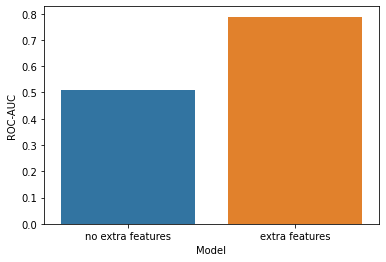

In [83]:
ax=sns.barplot(x=["no extra features","extra features"], y=[no_extra_features["auc"], extra_features["auc"]])
ax.set_xlabel("Model")
ax.set_ylabel("ROC-AUC")
#ax.set_ylim([0.9,1])